# Metropolis algorithm in Tensorflow


Here we look at the Metropolis-Hastings algorithm, which is a Markov-Chain Monte Carlo (MCMC) technique. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

## Probability distribution

Make the probability distribution equal to a sum of Gaussians. 

In [2]:
A = [1., 1.75]
tot = sum(A)
sigma = [1., 0.5]
center = [0.0, 6.0]

f = tfd.Normal(loc=center,scale=sigma)
mix = 0.6
g = tfd.Mixture(cat=tfd.Categorical(probs=[mix, 1.-mix]),components=[f[0],f[1]])


gvalsi = []
gxvals = np.linspace(-10,10,100)
for x in gxvals:
    gvalsi.append( g.prob(x) )
gvals = np.array(gvalsi)

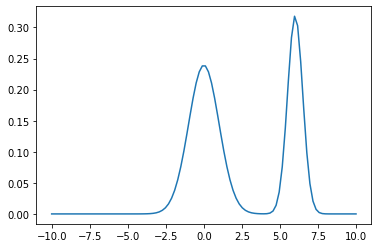

In [3]:
# Note the PDF is already normalized, in the original notebook, it was not.
plt.plot(gxvals, gvals)
plt.show()

## Run Metropolis-Hastings

In [4]:
x0 = 0.0
nskip = 1000
nmcsteps = 5000

samples = tfp.mcmc.sample_chain(
  num_results=nmcsteps,
  current_state=x0,
  kernel=tfp.mcmc.RandomWalkMetropolis(g.log_prob),
  num_burnin_steps=nskip,
  trace_fn=None,
  seed=16)

samples = np.array(samples)

## Plot the time series of the "walker"

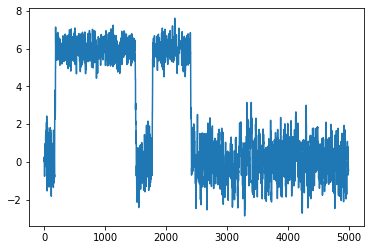

In [5]:
plt.plot(samples)
plt.show()

## Plot the distribution that MH arrives at

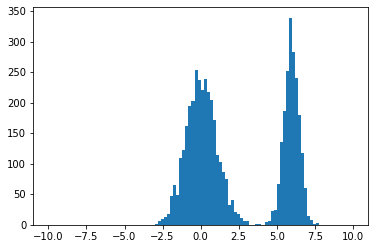

In [6]:
res = plt.hist( samples, bins=100, range=(-10,10) )
plt.show()